In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='iso-8859-1')

In [3]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1337,1089,Jennifer,Jones,NaN,1432686729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437559843,0.0,4375,1089,Jennifer,Jones,NaN,4375,NaN,NaN,NaN,USD,NaN,38.08,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.03,NaN,fedex,11|Ground,NaN,NaN,NaN,6.49865E+13,3.0,1.432687e+09,NaN,authorize.net,NaN,48.03,NaN,7209866618,553858,NaN,1,1432687426,1.440535e+09,1.432789e+09,CustomerSave5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5974,4375,40

In [4]:
df.shape

(4194, 181)

In [5]:
df = df.drop(["Orders.customer_id","Orders.fname","Orders.lname","Orders.order_number","Order_Items.parent"], axis=1)

In [6]:
loss = pd.DataFrame(df.isnull().sum())
loss

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
Customers.account_id,4191


In [7]:
few_data = loss[loss[0] < 1000]

In [8]:
df = df[few_data.index]

In [9]:
pd.DataFrame(df.isnull().sum())

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,423
Orders.id,0
Orders.currency,0
Orders.subtotal,0
Orders.tax,457


In [10]:
df.shape

(4194, 62)

In [11]:
for i in df.select_dtypes(include=np.object):
    df[i].fillna(df[i].value_counts().sort_values(ascending=False).index[0],inplace=True)

In [12]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [13]:
pd.DataFrame(df.isnull().sum())

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,0
Orders.id,0
Orders.currency,0
Orders.subtotal,0
Orders.tax,0


In [14]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.000000,3758,USD,57.20,0.000000,9.950000,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.000000,5284,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,E0149 +E0156,24.80,7.50,30.40,PF61071,0.000000
1,3,John,Smith,1386089139,1437764354,0.000000,23,USD,20.00,0.800838,9.990000,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.000000,31,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,online:en:US:1842,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,A4357,8.00,7.00,1.50,PF02132,0.876336
2,3,John,Smith,1386089139,1437764354,0.000000,9531,USD,68.78,0.000000,9.950000,78.73,manual,0|Standard Shipping,7.96468E+14,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,1.442167e+09,0.000000,11655,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,13.23,10.04,10.24,PF00342,0.000000
3,4,James,Anderson,1386780263,1437762646,0.000000,29,USD,19.56,0.000000,9.950000,29.55,fedex,11|Ground,7.96468E+14,3.0,1.386780e+09,authorize.net,29.55,0,02708Z,1,1386780263,1.440529e+09,1.386800e+09,0.000000,1816,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615K

In [15]:
df = df.groupby("Customers.id", as_index=False).sum()

In [16]:
df

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,3,2772178278,2875528708,0.000000,9554,88.78,0.800838,19.940000,108.72,6.0,2.835694e+09,108.720000,4,2835694107,2.890742e+09,2.828270e+09,0.000000,11686,178.0,5,73.78,54.37,178.000000,1.000000,2.000000,6.000000,110.700000,79.070000,54.370000,2.925533e+09,124.000000,2.900643e+09,21.230000,17.0400,11.740000,0.876336
1,4,1386780263,1437762646,0.000000,29,19.56,0.000000,9.950000,29.55,3.0,1.386780e+09,29.550000,1,1386780263,1.440529e+09,1.386800e+09,0.000000,1816,983.0,1,19.56,12.62,983.000000,0.000000,1.000000,3.000000,27.380000,19.560000,12.620000,1.462595e+09,62.000000,1.450323e+09,10.600000,7.8000,18.500000,0.876336
2,5,4160584797,4313292948,0.000000,1914,95.14,2.402513,29.850000,124.99,6.0,4.240329e+09,205.422263,3,4191605781,4.318265e+09,4.191740e+09,0.000000,3378,2100.0,3,95.14,66.33,10027.796136,2.974238,4.259351,9.800595,293.836642,184.582086,130.386383,4.387225e+09,185.087056,4.350981e+09,42.916432,24.4955,35.184894,2.629008
3,7,1388155947,1437763617,0.000000,32,39.19,0.000000,9.950000,49.14,3.0,1.388156e+09,49.140000,1,1388155947,1.440529e+09,1.388179e+09,0.000000,1797,1379.0,1,39.19,27.99,1379.000000,0.000000,1.000000,3.000000,54.870000,39.190000,27.990000,1.462370e+09,62.000000,1.450323e+09,13.600000,9.2000,11.300000,0.000000
4,8,1389303216,1437763421,0.000000,40,59.75,0.000000,9.950000,69.70,3.0,1.389647e+09,69.700000,1,1389303216,1.440529e+09,1.389627e+09,0.000000,1796,815.0,1,59.75,45.96,815.000000,0.000000,1.000000,3.000000,84.290000,60.210000,45.960000,1.462370e+09,62.000000,1.450323e+09,17.500000,16.0000,10.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,3730,1463408698,1463408698,0.000000,17421,14.85,1.210000,0.000000,16.06,3.0,1.463409e+09,16.060000,0,1463408854,1.449607e+09,1.442167e+09,0.000000,20186,1842.0,1,14.85,15.50,1842.000000,3.000000,1.000000,3.000000,33.110000,23.650000,15.500000,1.462370e+09,62.000000,1.450324e+09,5.000000,5.0000,7.000000,3.000000
3050,3732,1463412756,1463412756,0.137364,17425,39.99,0.000000,7.141263,39.99,1.0,1.463413e+09,39.990000,0,1463412757,1.449607e+09,1.442167e+09,0.124159,20190,782.0,1,39.99,28.16,782.000000,3.000000,1.000000,3.000000,55.190000,69.990000,28.160000,1.462574e+09,62.000000,1.450322e+09,14.600000,4.1000,18.000000,3.000000
3051,3733,1463413245,1463413245,0.137364,17426,1099.00,0.000000,7.141263,989.10,1.0,1.463413e+09,989.100000,5,1463413246,1.463420e+09,1.442167e+09,0.000000,20191,2707.0,1,1099.00,675.00,2707.000000,3.000000,2.000000,1.000000,2107.500000,1099.000000,675.000000,1.463420e+09,62.000000,1.450467e+09,45.000000,20.7500,20.750000,3.000000
3052,3735,1463416687,1463416687,0.137364,17431,129.99,0.000000,0.000000,129.99,3.0,1.463417e+09,129.990000,0,1463416694,1.449607e+09,1.442167e+09,0.124159,20196,993.0,1,129.99,91.00,993.000000,3.000000,1.000000,3.000000,175.810000,129.990000,91.000000,1.463163e+09,62.000000,1.450323e+09,25.250000,8.6000,23.200000,3.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customers.id               3054 non-null   int64  
 1   Customers.create_date      3054 non-null   int64  
 2   Customers.last_modified    3054 non-null   int64  
 3   Customers.customer_type    3054 non-null   float64
 4   Orders.id                  3054 non-null   int64  
 5   Orders.subtotal            3054 non-null   float64
 6   Orders.tax                 3054 non-null   float64
 7   Orders.shipping            3054 non-null   float64
 8   Orders.total               3054 non-null   float64
 9   Orders.payment_status      3054 non-null   float64
 10  Orders.payment_date        3054 non-null   float64
 11  Orders.payment_amount      3054 non-null   float64
 12  Orders.status              3054 non-null   int64  
 13  Orders.placed_date         3054 non-null   int64

In [18]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters,x):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [20]:
clust(10,df)

Number of cluster 2, silhouette 0.9643338552483086
Number of cluster 3, silhouette 0.9126262419479501
Number of cluster 4, silhouette 0.892800698820851
Number of cluster 5, silhouette 0.9447973439487392
Number of cluster 6, silhouette 0.9457812556308379
Number of cluster 7, silhouette 0.9463803308327414
Number of cluster 8, silhouette 0.9660686731924447
Number of cluster 9, silhouette 0.97354995667076
Number of cluster 10, silhouette 0.9786999595490219


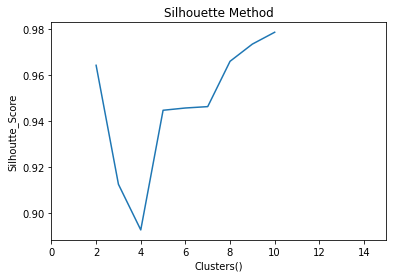

In [21]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15);

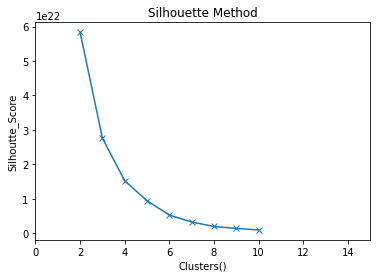

In [22]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15);